In [2]:
from google.colab import drive
import os
drive.mount(r'/content/gdrive/')
os.chdir('/content/gdrive/MyDrive/TESIS-SANTIAGO/Agentes/12-05-2022/simulacion_agentes_1305-2022')

Mounted at /content/gdrive/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
import seaborn as sns

In [7]:
from tqdm import tqdm

Voy a escribir una funcion que me calcule el valor de los recuperados en funcion del $R_0$ en un modelo SIR basico-

In [4]:
def dx(X,R0):
    #constantes del problema
    gama=1/10
    beta=R0*gama
    #Componentes del vector de estados SIR de mi problema
    S=X[0] 
    I=X[1]
    R=X[2]
  
    #Derivada temporal de cada uno de las clases epidemiologicas
    St=-beta*I*S
    It= beta*I*S-gama*I
    Rt= gama*I
  
    #Mi funcion devuelve el valor
    return np.array([St,It,Rt])

In [5]:
def dinamica_SIR(R0):
    X=np.array([1-1/120000,1/120000,0]) #Condiciones iniciales
    dt=0.001 #dias
    N_dias=2500 #Cantidad de dias de mi simulacion
    #Matriz que guarda X en cada paso de la simulacion
    #Xt=np.zeros((3,(N_dias/dt)))
    for i in np.arange(0,N_dias,dt):
      X=X+dt*dx(X,R0)
    return X[2]

In [8]:
recuperados=[]
for R0 in tqdm(np.arange(0,1.5,0.1)):
  recuperados.append(dinamica_SIR(R0))

100%|██████████| 15/15 [02:19<00:00,  9.29s/it]


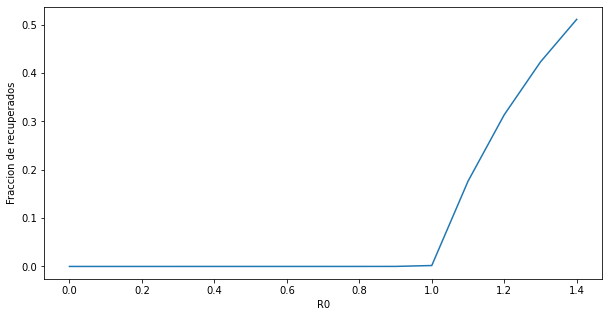

In [9]:
plt.plot(np.arange(0,1.5,0.1),recuperados)
plt.xlabel('R0')
plt.ylabel('Fraccion de recuperados')
plt.show()

Text(0, 0.5, 'Fraccion de recuperados')

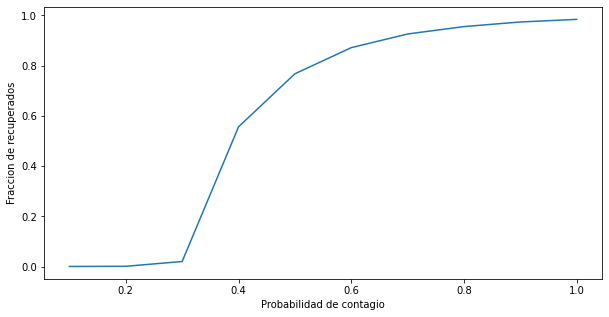

In [ ]:
results=np.load('results_nuevo_600.npy')
recuperados_result=[results[i][2][-1]/600000 for i in range(len(results))]
plt.figure(5)
plt.plot(np.arange(0.1,1.1,0.1),np.array(recuperados_result))
plt.xlabel('Probabilidad de contagio')
plt.ylabel('Fraccion de recuperados')

In [ ]:
recuperados_result

[0.00109,
 0.0016583333333333333,
 0.020783333333333334,
 0.55663,
 0.7676466666666667,
 0.8716633333333333,
 0.9259983333333334,
 0.95552,
 0.9737566666666667,
 0.9842266666666667]

In [ ]:
recuperados

[8.333333333217541e-06,
 9.259250208041901e-06,
 1.0416642231348487e-05,
 1.1904709978919397e-05,
 1.3888781764098164e-05,
 1.6666396261286296e-05,
 2.0831932289325994e-05,
 2.7761253642849773e-05,
 4.138201032665886e-05,
 7.647216402124539e-05,
 0.0002081310274871417,
 0.0009280970516798028,
 0.006015144264221653,
 0.04405794789676459,
 0.22321859352010157,
 0.47554616518231213,
 0.6127368102854054,
 0.6832834769061606,
 0.7301471447812431,
 0.7665317201990381,
 0.7965748710142199,
 0.8219826156282841,
 0.8437108088320661,
 0.8624159977667605,
 0.8785967028772009,
 0.8926490391363825,
 0.9048948281078574,
 0.9155989101865212,
 0.924981166659983,
 0.9332254210426295,
 0.9404862590233463,
 0.9468943586689633,
 0.9525607113779566,
 0.9575799973548392,
 0.9620333067032114,
 0.9659903483361336,
 0.9695112543839159,
 0.9726480626776995,
 0.9754459412712986,
 0.9779442049584783,
 0.9801771630947607,
 0.9821748298596331,
 0.9839635217771222,
 0.9855663623844833,
 0.9870037100844153]

In [ ]:
np.where(np.array(recuperados)==0.9839635217771222)

(array([42]),)

In [ ]:
np.arange(0,4.5,0.1)[42]

4.2

Puedo intentar asociar los recuperados en funcion de $P$ con los recuperados en funcion de $R_0$ y asi encontrar una relacion entre $P$ y $R_0$.

Asocio recuperados($P$) con recuperados($R_0$) , 

1.   $0.00109$ con $0.000928$
2.   $0.02078$ con $0.04405$
1.   $0.55663$ con $0.61273$

1.   $0.76764$ con $0.76653$
2.   $0.87166$ con $0.8785$

1.   $0.92599$ con $0.9249$
2.   $0.95552$ con $0.9575$

1.   $0.9737$ con $0.97264$
2.   $0.9842$ con $0.98396$












In [ ]:
R0_curva=[(0.1,1.1),(0.3,1.3), (0.4,1.6), (0.5,1.9), (0.6, 2.4), (0.7, 2.8), (0.8,3.3), (0.9, 3.7), (1,4.2)]

In [ ]:
np.save('R0_curva.npy', R0_curva)

In [ ]:
R0_curva

[(0.1, 1.1),
 (0.3, 1.3),
 (0.4, 1.6),
 (0.5, 1.9),
 (0.6, 2.4),
 (0.7, 2.8),
 (0.8, 3.3),
 (0.9, 3.7),
 (1, 4.2)]

In [ ]:
R0_exponente

[(0.4, 1.5650435869849106),
 (0.5, 1.9850783633013864),
 (0.6, 2.3057891722229105),
 (0.7, 2.6001542106810556),
 (0.8, 2.8658310232675515),
 (0.9, 3.1447381537227397),
 (1, 3.160100953856733)]